# Data Loading, Storage, and File Formats

The tools in this book are of little use if you can’t easily import and export data in Python. I’m going to be focused on input and output with pandas objects, though there are of course numerous tools in other libraries to aid in this process. NumPy, for example, features low-level but extremely fast binary data loading and storage, including support for memory-mapped array. See Chapter 12 for more on those.
Input and output typically falls into a few main categories: reading text files and other more efficient on-disk formats, loading data from databases, and interacting with network sources like web APIs.

## Reaing and Writing Data in Text Format 

In [2]:
import pandas as pd
import numpy as np

In [3]:
!type D:\SoftwareLearn\Python_Book_Study\PythonForDataAnalysis\pydata-book-master\ch06\ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [4]:
path = 'D:\SoftwareLearn\Python_Book_Study\PythonForDataAnalysis\pydata-book-master'
df = pd.read_csv(path + '\ch06\ex1.csv')

In [5]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


We could also have used read_table and specifying the delimiter

In [6]:
pd.read_table(path + '\ch06\ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
path1 = path + r'\ch06\ex2.csv'
print(path1)
!type dir(path1)

D:\SoftwareLearn\Python_Book_Study\PythonForDataAnalysis\pydata-book-master\ch06\ex2.csv


系统找不到指定的文件。


In [8]:
pd.read_csv(path + '\ch06\ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
pd.read_csv(path + '\ch06\ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv(path + '\ch06\ex2.csv', names =names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [11]:
pwd


'D:\\SoftwareLearn\\Python_Book_Study\\PythonForDataAnalysis'

In [12]:
!type pydata-book-master\ch06\csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [13]:
parsed = pd.read_csv('pydata-book-master\ch06\csv_mindex.csv', index_col=['key1','key2'])

In [14]:
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [15]:
list(open('pydata-book-master\ch06\ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [16]:
open('pydata-book-master\ch06\ex3.txt')

<_io.TextIOWrapper name='pydata-book-master\\ch06\\ex3.txt' mode='r' encoding='cp936'>

In [17]:
result = pd.read_table('pydata-book-master\ch06\ex3.txt', sep='\s+')

In [18]:
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [19]:
!type pydata-book-master\ch06\ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [20]:
pd.read_csv('pydata-book-master\ch06\ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [21]:
!type pydata-book-master\ch06\ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [22]:
result = pd.read_csv('pydata-book-master\ch06\ex5.csv')

In [23]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [24]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


The na_values option can take either a list or set of strings to consider missing values

In [25]:
result = pd.read_csv('pydata-book-master\ch06\ex5.csv', na_values=['NULL'])

In [26]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [27]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}

In [28]:
result = pd.read_csv('pydata-book-master\ch06\ex5.csv', na_values=sentinels)

In [29]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


*Table 6-2. read_csv /read_table function arguments*
## Argument         Description

<table><tr>
         <td>path</td>   
         <td>String indicating filesystem location, URL, or file-like object</td>                             
     </tr><tr>
         <td>sep or delimiter</td><td> Character sequence or regular expression to use to split fields in each row 
         </td>                   
         </tr><tr>
         <td>header</td>
         <td>Row number to use as column names. Defaults to 0 (first row), but should be None if there is no header row</td>                               
         </tr><tr>
         <td>index_col</td>           
         <td> Column numbers or names to use as the row index in the result. Can be a single name/number or a list
of them for a hierarchical index</td>                               
         </tr><tr>
         <td>names</td>           
              
                   <td> List of column names for result, combine with header=None</td>
                                
         </tr>
        <tr>
         <td>skiprows</td>           
              
                   <td>  Number of rows at beginning of file to ignore or list of row numbers (starting from 0) to skip</td>
                                
         </tr>
         
         <tr>
         <td>na_values</td>           
              
                   <td>  Sequence of values to replace with NA</td>
                                
         </tr><tr>
         <td>comment</td>           
              
                   <td> Character or characters to split comments off the end of lines</td>
                                
         </tr><tr>
         <td>parse_dates</td>           
              
                   <td> Attempt to parse data to datetime; False by default. If True, will attempt to parse all columns. Otherwise
can specify a list of column numbers or name to parse. If element of list is tuple or list, will combine multiple columns together and parse to date (for example if date/time split across two columns)</td>
                                
         </tr> 
<tr>
         <td>keep_date_col</td>             
          <td> If joining columns to parse date, drop the joined columns. Default True
converters Dict containing column number of name mapping to functions. For example {'foo': f} would apply the function f to all values in the 'foo' column dayfirst When parsing potentially ambiguous dates, treat as international format (e.g. 7/6/2012 -> June 7,2012). Default FalseList of column names for result, combine with header=None</td>                                
         </tr><tr>
         <td>date_parser</td>             
         <td> Function to use to parse dates</td>                              
         </tr><tr>
         <td>nrows</td>              
         <td>Number of rows to read from beginning of file
iterator Return a TextParser object for reading file piecemeal
chunksize For iteration, size of file chunks</td>                                
         </tr><tr>
         <td>iterator</td>              
         <td>Return a TextParser object for reading file piecemeal</td>                             
         </tr><tr>
         <td>chunksize</td>              
         <td>For iteration, size of file chunks</td>                                
         </tr><tr>
         <td>skip_footer</td>              
         <td> Number of lines to ignore at end of file</td>                   
         </tr><tr> 
         <td> verbose</td>              
         <td>Print various parser output information, like the number of missing values placed in non-numericcolumns</td>                            
         </tr><tr>         
         <td>encoding</td>              
         <td>Text encoding for unicode. For example 'utf-8' for UTF-8 encoded text</td>                                
         </tr><tr>         
         <td>squeeze</td>              
         <td>If the parsed data only contains one column return a Series</td>
         </tr><tr>
         <td>thousands</td>           
         <td>  Separator for thousands, e.g. ',' or '.' </td>
         </tr>          

</table>

## Reading Text Files in Pieces

In [30]:
result = pd.read_csv('pydata-book-master\ch06\ex6.csv')

In [31]:
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U
7,-0.913135,1.530624,-0.572657,0.477252,K
8,0.358480,-0.497572,-0.367016,0.507702,S
9,-1.740877,-1.160417,-1.637830,2.172201,G


In [32]:
pd.read_csv('pydata-book-master\ch06\ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [33]:
chunker = pd.read_csv('pydata-book-master\ch06\ex6.csv', chunksize=1000)

In [34]:
chunker

In [35]:
tot = pd.Series([])

In [36]:
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(),fill_value=0)

In [37]:
tot = tot.sort_values(ascending=False)

In [38]:
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

## Writing Data Out to Text Format

In [39]:
data = pd.read_csv('pydata-book-master\ch06\ex5.csv')

In [40]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [41]:
data.to_csv('pydata-book-master\ch06\out.csv')

In [42]:
!type pydata-book-master\ch06\out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [43]:
import sys
data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [44]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [45]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [46]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [74]:
dates = pd.date_range('1/1/2000', periods=7)

In [77]:
type(dates)

pandas.tseries.index.DatetimeIndex

In [49]:
dir(pd)

['Categorical',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int64Index',
 'MultiIndex',
 'NaT',
 'Panel',
 'Panel4D',
 'Period',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseList',
 'SparsePanel',
 'SparseSeries',
 'SparseTimeSeries',
 'Term',
 'TimeGrouper',
 'TimeSeries',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'WidePanel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_np_version_under1p10',
 '_np_version_under1p11',
 '_np_version_under1p12',
 '_np_version_under1p8',
 '_np_version_under1p9',
 '_period',
 '_sparse',
 '_testing',
 '_version',
 'algos',
 'bdate_range',
 'compat',
 'computation',
 'concat',
 'core',
 'crosstab',
 'cut',
 'date_range',
 'datetime',
 'datetools',
 'dependency',
 

In [50]:
help(pd.date_range)

Help on function date_range in module pandas.tseries.index:

date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency datetime index, with day (calendar) as the default
    frequency
    
    Parameters
    ----------
    start : string or datetime-like, default None
        Left bound for generating dates
    end : string or datetime-like, default None
        Right bound for generating dates
    periods : integer or None, default None
        If None, must specify start and end
    freq : string or DateOffset, default 'D' (calendar daily)
        Frequency strings can have multiples, e.g. '5H'
    tz : string or None
        Time zone name for returning localized DatetimeIndex, for example
    Asia/Hong_Kong
    normalize : bool, default False
        Normalize start/end dates to midnight before generating date range
    name : str, default None
        Name of the resulting index
    closed : st

In [51]:
dates = pd.date_range('1/1/2003', periods=6)

In [52]:
dates

DatetimeIndex(['2003-01-01', '2003-01-02', '2003-01-03', '2003-01-04',
               '2003-01-05', '2003-01-06'],
              dtype='datetime64[ns]', freq='D')

http://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html

In [53]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [54]:
df

,A,B,C,D
2003-01-01,-0.142039,-1.049686,0.673834,-0.098071
2003-01-02,0.156165,0.775595,2.398929,1.279466
2003-01-03,-0.612810,0.413822,1.062612,0.143039
2003-01-04,0.036775,0.497933,0.426812,0.308197
2003-01-05,-0.111688,1.530647,1.248317,0.037493
2003-01-06,-0.229201,2.065616,0.106092,-0.360809


In [55]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [56]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [57]:
df.iloc[3]

A    0.036775
B    0.497933
C    0.426812
D    0.308197
Name: 2003-01-04 00:00:00, dtype: float64

In [58]:
df


,A,B,C,D
2003-01-01,-0.142039,-1.049686,0.673834,-0.098071
2003-01-02,0.156165,0.775595,2.398929,1.279466
2003-01-03,-0.612810,0.413822,1.062612,0.143039
2003-01-04,0.036775,0.497933,0.426812,0.308197
2003-01-05,-0.111688,1.530647,1.248317,0.037493
2003-01-06,-0.229201,2.065616,0.106092,-0.360809


In [59]:
df.iloc[[1,2,4],[0,2]]

,A,C
2003-01-02,0.156165,2.398929
2003-01-03,-0.612810,1.062612
2003-01-05,-0.111688,1.248317


In [60]:
df.iloc[1,1]

0.77559455334031391

In [61]:
df.A

2003-01-01   -0.142039
2003-01-02    0.156165
2003-01-03   -0.612810
2003-01-04    0.036775
2003-01-05   -0.111688
2003-01-06   -0.229201
Freq: D, Name: A, dtype: float64

In [62]:
df2 = df.copy()

In [63]:
df2['E'] = ['one', 'one','two','three','four','three']

In [64]:
df2

,A,B,C,D,E
2003-01-01,-0.142039,-1.049686,0.673834,-0.098071,one
2003-01-02,0.156165,0.775595,2.398929,1.279466,one
2003-01-03,-0.612810,0.413822,1.062612,0.143039,two
2003-01-04,0.036775,0.497933,0.426812,0.308197,three
2003-01-05,-0.111688,1.530647,1.248317,0.037493,four
2003-01-06,-0.229201,2.065616,0.106092,-0.360809,three


In [65]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2003-01-03,-0.612810,0.413822,1.062612,0.143039,two
2003-01-05,-0.111688,1.530647,1.248317,0.037493,four


In [66]:
df2['E'].isin(['two'])

2003-01-01    False
2003-01-02    False
2003-01-03     True
2003-01-04    False
2003-01-05    False
2003-01-06    False
Freq: D, Name: E, dtype: bool

In [67]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20030101',periods=6))

In [68]:
s1

2003-01-01    1
2003-01-02    2
2003-01-03    3
2003-01-04    4
2003-01-05    5
2003-01-06    6
Freq: D, dtype: int64

In [69]:
df['F'] = s1

In [70]:
df

,A,B,C,D,F
2003-01-01,-0.142039,-1.049686,0.673834,-0.098071,1
2003-01-02,0.156165,0.775595,2.398929,1.279466,2
2003-01-03,-0.612810,0.413822,1.062612,0.143039,3
2003-01-04,0.036775,0.497933,0.426812,0.308197,4
2003-01-05,-0.111688,1.530647,1.248317,0.037493,5
2003-01-06,-0.229201,2.065616,0.106092,-0.360809,6


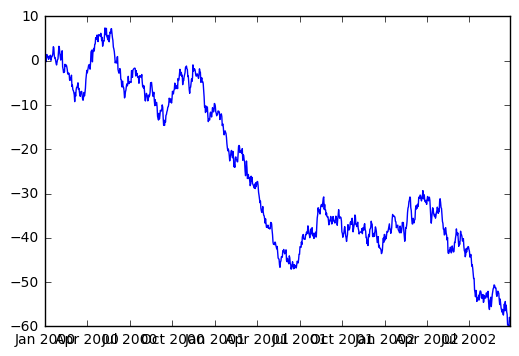

In [71]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
x = pd.date_range('1/1/2000', periods=1000)
y = ts
plt.plot(x, y)
plt.show()

In [72]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

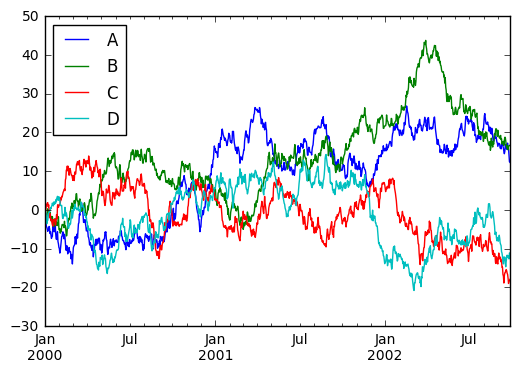

In [73]:
plt.show()